In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
#df = pd.read_csv('data/data.csv')
city = pd.read_csv(city_data_to_load)
ride= pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
cityride= pd.merge((city), (ride), on = 'city')
# Display the data table for preview


In [2]:
city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
ride.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
cityride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
# our objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

#group by method
grouped = cityride.groupby(['city','type', 'driver_count'], 
                           as_index=False).agg({'fare':'mean', 'ride_id': 'count'})


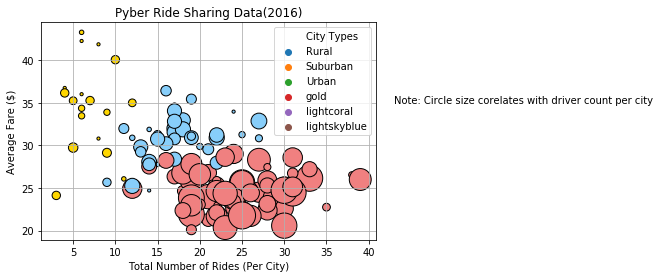

In [7]:
for index, x  in grouped.iterrows():
    if grouped.loc[index,'type'] == 'Urban':
         grouped.loc[index,'color'] = 'lightcoral'
    
    elif grouped.loc[index,'type'] == 'Suburban':
         grouped.loc[index,'color'] = 'lightskyblue'           
    else: 
         grouped.loc[index,'color'] = 'gold'

#get unique types
uniqueType = np.unique(grouped[['type', 'color']].values)
            
#  You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#  When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.

# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

        
grouped.head()

fig, ax = plt.subplots()

plt.scatter(grouped.ride_id, grouped.fare, 
            facecolor= grouped.color, 
            edgecolors="black", 
            label='',
            marker='o',
            s = grouped.driver_count * 10)
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
ax.grid(True)

# Create dummy plot just to create the legend
plt.scatter([], [], 
                c = '', 
                label = 'City Types')

for item in uniqueType:
    plt.scatter([], [], 
                #c = item, 
                label = item)
#loc = 0 is for the best position of the legend
#scatterpoints = 1 will only show one point in the legend instead of multiple points
plt.legend(loc = 0, scatterpoints = 1)

# Incorporate a text label regarding circle size
plt.title('Pyber Ride Sharing Data(2016)')
plt.text(43,35, 'Note: Circle size corelates with driver count per city')
#
#plt.show()
# Save Figure
plt.savefig('pyber.png')

In [8]:
plt.show()

In [9]:
# Show plot
plt.show()

## Total Fares by City Type

TotalSum = 63538.64


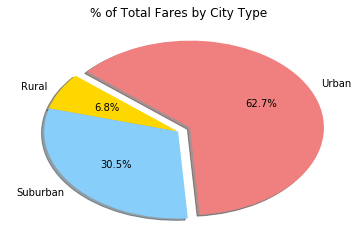

In [13]:
# Calculate Type Percents
TotalSum = cityride ["fare"].sum()
print ("TotalSum = "+ str (TotalSum))

Piegroupcity = cityride.groupby(['type'], as_index=False).agg({'fare':lambda x:(x.sum()/TotalSum)*100})


colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(Piegroupcity.fare, explode=explode, 
        colors=colors, 
        labels = Piegroupcity.type, autopct="%1.1f%%", 
        shadow=True, startangle=140 )

plt.title("% of Total Fares by City Type")
#plt.show()
# # Save Figure
plt.savefig('fares_by_typ_pie.png')

In [14]:
# # Show Figure
# plt.show()

## Total Rides by City Type

Totalrides= 2375


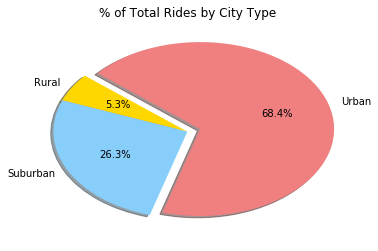

In [15]:
# Calculate Ride Percents
Totalrides = cityride ["ride_id"].count()
print ("Totalrides= "+ str (Totalrides))

Piegroupride = cityride.groupby(['type'], as_index=False).agg({'ride_id':lambda x:(x.count() / Totalrides) *100 })


colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(Piegroupride.ride_id, explode=explode, 
        colors=colors, 
        labels = Piegroupride.type, autopct="%1.1f%%", 
        shadow=True, startangle=140 )

plt.title("% of Total Rides by City Type")
# Build Pie Chart

# Save Figure
plt.savefig('ride_by_cityType_pie.png')

In [320]:
# Show Figure
plt.show()


## Total Drivers by City Type

totalDrivers= 2973


Text(0.5,1,'% of Total Drivers by City Type')

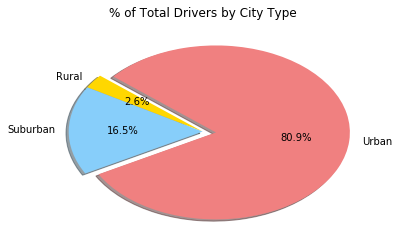

In [332]:
# Calculate Driver Percents
totalDrivers = city["driver_count"].sum()
print ("totalDrivers= "+ str (totalDrivers))

PiegroupDrivers = city.groupby(['type'], as_index=False).agg({'driver_count':lambda x:(x.sum() / totalDrivers) *100 })


colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.pie(PiegroupDrivers.driver_count, explode=explode, 
        colors=colors, 
        labels = PiegroupDrivers.type, autopct="%1.1f%%", 
        shadow=True, startangle=140 )

plt.title("% of Total Drivers by City Type")
# Build Pie Charts

# Save Figure


In [317]:
# Show Figure
plt.show()

plt.savefig('drivers_by_cityType_pie.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
# written description of three observable trends based on the data.
1.Urban area Rides are more than rural and semi-urban areas.
2. Fares- Urban is the leading in the amount of fares.
3. There are more drivers in urban than in other areas.